<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_09_Seaborn%EC%8B%A4%EC%8A%B5_tip%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.09. Seborn 실습 - tip 데이터


---

* 날짜:
* 이름:


## 학습내용

    - Catplot을 이용해 범주별 데이터의 분포를 시각화 한다.
    - Catplot의 다양한 시각화 종류를 알아본다.

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
tips = sns.load_dataset('tips')
tips.head()
```

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### | 데이터 기본 탐색


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

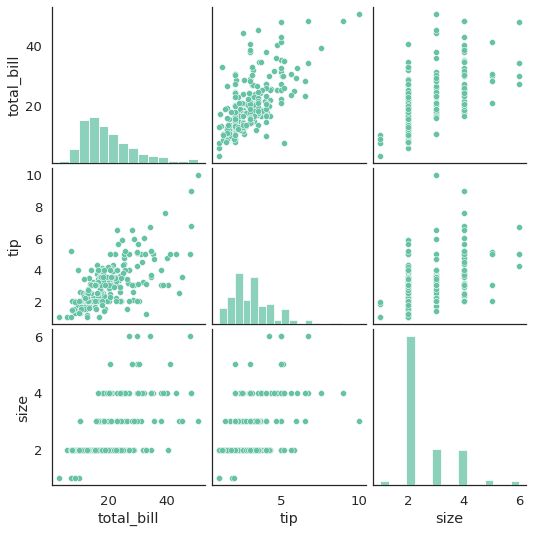

In [5]:
sns.pairplot(tips)

### (2) Categorical plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.catplot(x=None, y=None, 
                hue=None, data=None,
                kind = 'strip' # {swarm, box, violin, boxen, point, bar, count} 
                row=None, col=None, 
                col_wrap=None, 
                units=None, seed=None, order=None,
                hue_order=None, row_order=None, 
                col_order=None, height=5, 
                aspect=1, orient=None, color=None, 
                palette=None, legend=True, 
                legend_out=True, 
                sharex=True, sharey=True, 
                margin_titles=False,
                facet_kws=None,
                jitter=True)

```

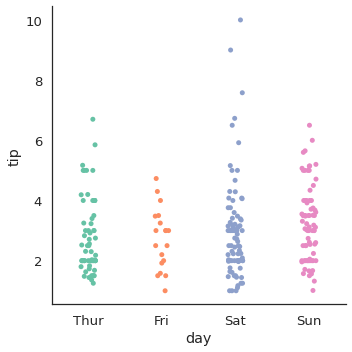

In [6]:
sns.catplot(data = tips, x = 'day', y = 'tip') # 날짜별 팁의 분포

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


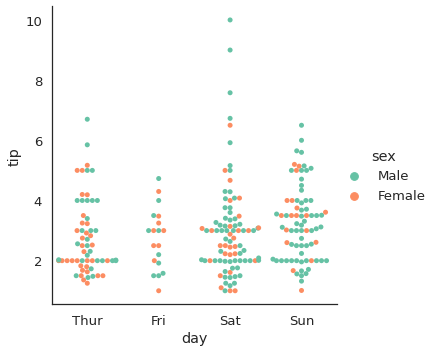

In [8]:
sns.catplot(data = tips, x = 'day', y = 'tip',  # 날짜별 팁의 분포
            kind = 'swarm', # 기본: strip
            hue = 'sex',
            )

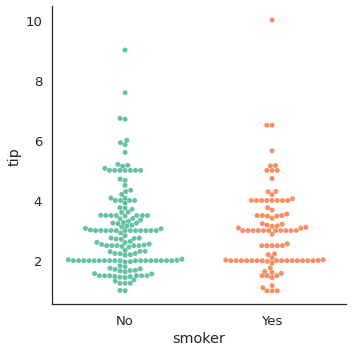

In [11]:
# 흡연 여부에 따라, 팁의 분포 그리기
sns.catplot(data = tips, x = 'smoker', y = 'tip',
            kind = 'swarm', # 기본: strip
            order = ['No', 'Yes'] # x 카테고리 순서 
            )

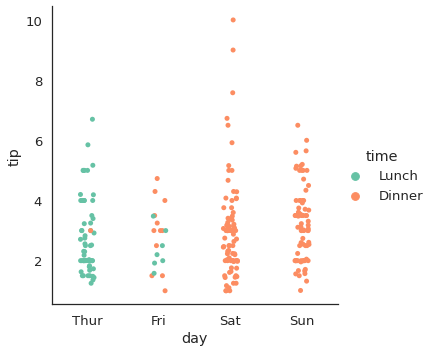

In [17]:
# 요일 별로 total_bill 그리기 -> + 시간별
sns.catplot(data = tips, x = 'day', y = 'tip',
            hue = 'time'
            )

#### | 플롯 분할



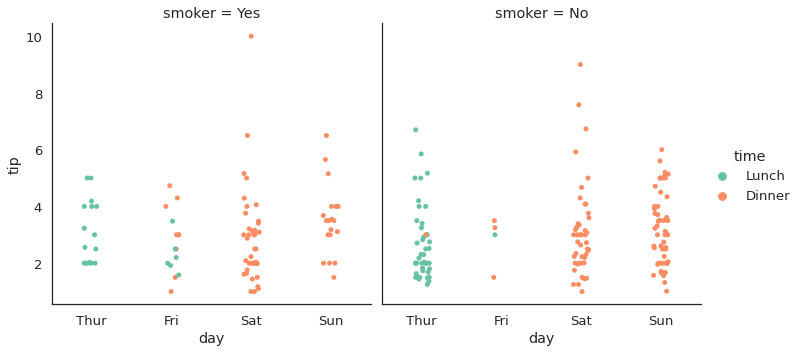

In [18]:
sns.catplot(data = tips, x = 'day', y = 'tip',
            hue = 'time', col = 'smoker'
            )

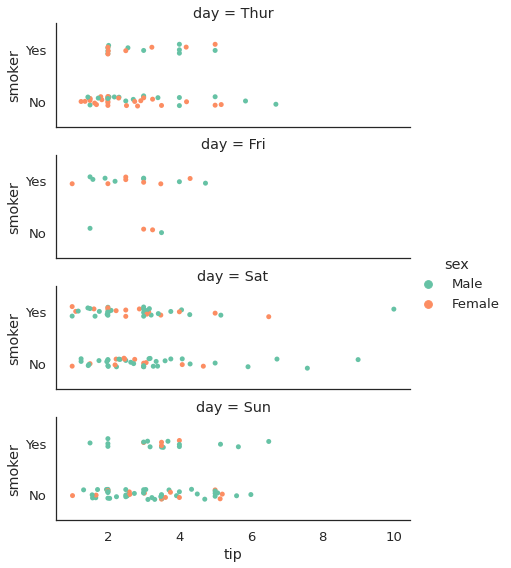

In [26]:
# 수평 플롯
sns.catplot(data = tips, y = 'smoker', x = 'tip',
            row = 'day', # 행으로 분할( 날짜별)
            height = 2, # size 조절
            aspect = 3,
            hue = 'sex')

### (3) 범주별 통계 시각화



#### | Bar plots


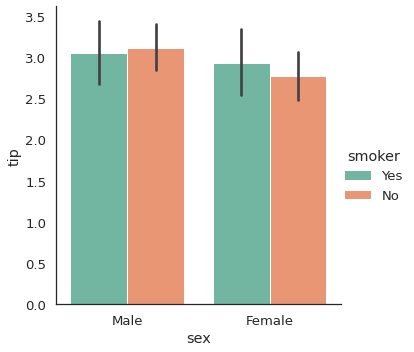

In [27]:
sns.catplot(data = tips, x = 'sex', y = 'tip',
            kind = 'bar', # 막대그래프
            hue = 'smoker' # 흡연구분
            )

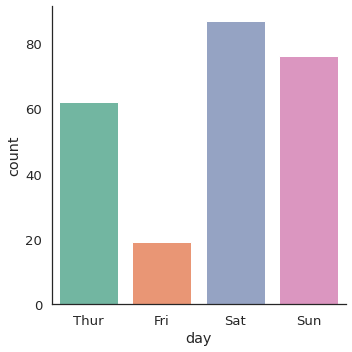

In [29]:
sns.catplot(data = tips, x = 'day',
            kind = 'count' 
            )

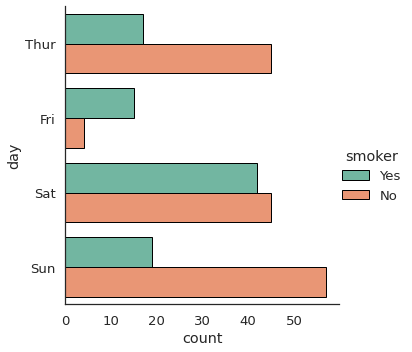

In [33]:
sns.catplot(data = tips, y = 'day', kind = 'count',
            hue = "smoker",
            edgecolor = 'black' 
            )

#### | Point plots



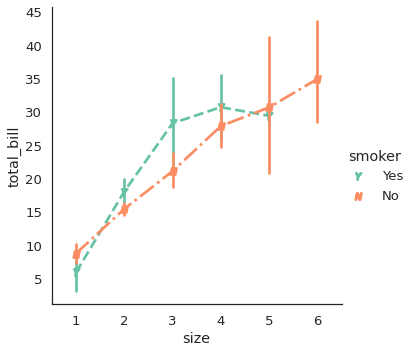

In [48]:
sns.catplot(data = tips, x = 'size', y = 'total_bill',
            kind = 'point', # 포인트플롯
            hue = 'smoker',
            linestyles = ['--','-.'],
            markers = ['$Y$', '$N$'], 
            )

### (4) 범주별 분포 시각화


#### | Box plots


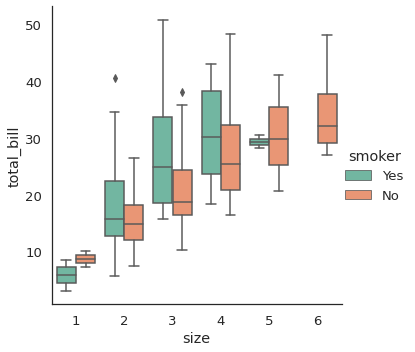

In [51]:
sns.catplot(data = tips, x = 'size', y = 'total_bill',
            kind = 'box',
            hue = 'smoker',
            )

#### | Violin plots

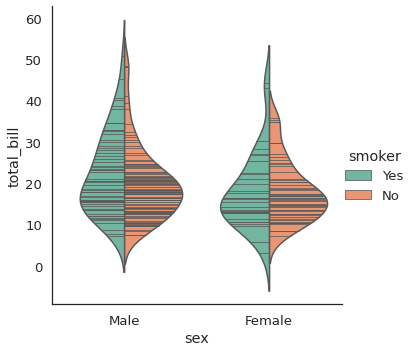

In [58]:
sns.catplot(data = tips, x = 'sex', y = 'total_bill',
            kind = 'violin',
            hue = 'smoker',
            inner = 'stick',
            split = True)

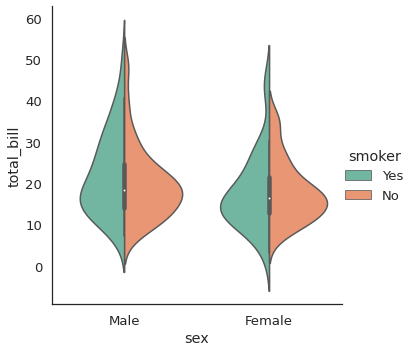

In [66]:
 g = sns.catplot(data = tips, x = 'sex', y = 'total_bill',
             kind = 'violin',
             hue = 'smoker',
        
             split = True)


#sns.swarmplot(data = tips,  x = 'sex', y = 'total_bill', ax = g.ax,
#              color = 'navy', size = 3)


## **과제: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('titanic')
df.head()
```

In [87]:
df = sns.load_dataset('titanic')

#### | 데이터 기본 탐색


In [98]:
# survived 와 alive 같은가의 여부
mask = (df['survived'] == 'survived') & (df['alive'] == 'no')
df[mask]
# 살아남은 사람중 alive 하지 않은 사람이 없는 것을 보아 survivie -> alive == 'yes'

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [71]:
df.info() #  0 = 사망, 1 = 생존

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
df['survived'] = list(map(lambda x: 'deceased' if x == 0 else 'survived', df['survived']))

### (2) Categorical plot


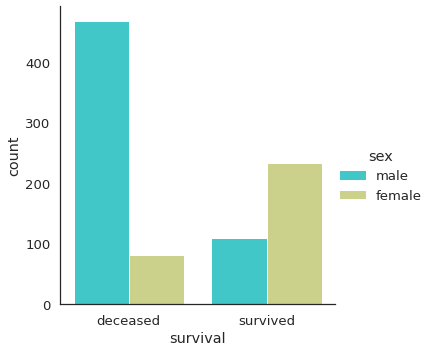

In [116]:
sns.catplot( data = df, x = 'survived',
            kind  = 'count', 
            hue = 'sex',
            palette = 'rainbow')
plt.xlabel('survival')
plt.show()

#### | 플롯 분할


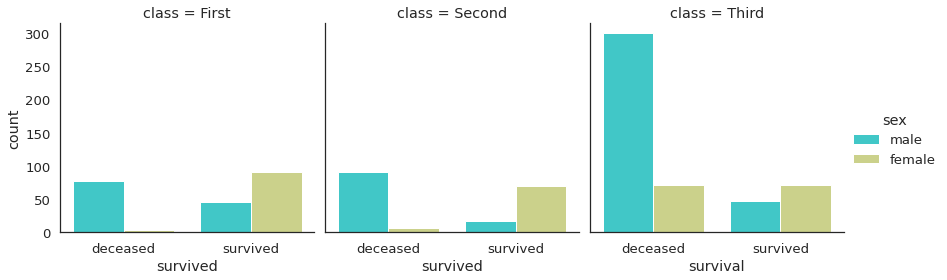

In [141]:
sns.catplot( data = df, x = 'survived',
            kind  = 'count', 
            hue = 'sex',
            palette = 'rainbow',
            col = 'class',
            height = 4)
plt.xlabel('survival')
plt.show()

### (3) 범주별 통계 시각화


#### | Bar plots

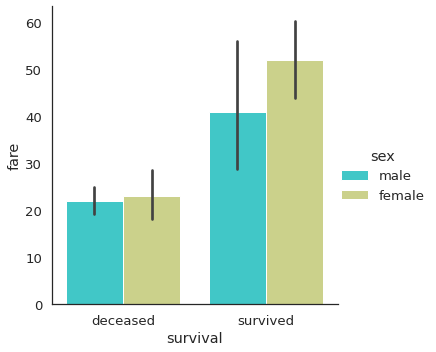

In [124]:
sns.catplot( data = df, x = 'survived', y = 'fare',
            hue = 'sex',
            kind  = 'bar', 
            palette = 'rainbow',)
plt.xlabel('survival')
plt.show()

#### | Point plots



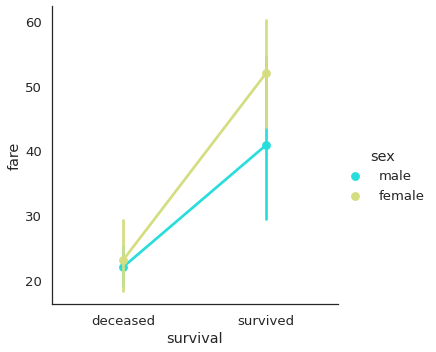

In [133]:
sns.catplot( data = df, x = 'survived', y = 'fare',
            hue = 'sex',
            kind  = 'point', 
            palette = 'rainbow',)
plt.xlabel('survival')
plt.show()

In [131]:
df.groupby('adult_male')['class'].count()

adult_male
False    354
True     537
Name: class, dtype: int64

### (4) 범주별 분포 시각화


#### | Box plots


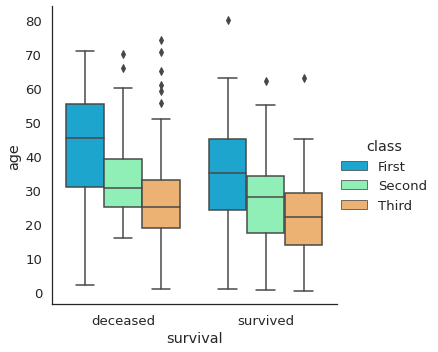

In [151]:
sns.catplot( data = df, x = 'survived', y = 'age',
            kind  = 'box', 
            hue = 'class',
            palette = 'rainbow',
            )
plt.xlabel('survival')
plt.show()

#### | Violin plots

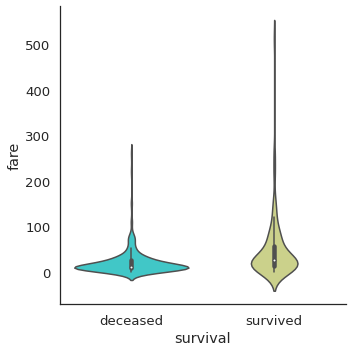

In [148]:
sns.catplot( data = df, x = 'survived', y = 'fare',
            kind  = 'violin', 
            palette = 'rainbow',
          )
plt.xlabel('survival')
plt.show()